In [17]:
import pathlib
import os
import sys
from torch.utils.data import DataLoader

PACKAGE_PARENT = pathlib.Path.cwd().parent 
SCR_DIR = os.path.join(PACKAGE_PARENT, 'src')
sys.path.append(SCR_DIR)

from config.loc_config import TRAIN_DATA_LOC, TEST_DATA_LOC, PRED_DATA_LOC, ANNOT_LOC
from config.data_config import INPUT_WIDTH, INPUT_HEIGHT, INPUT_CHANNEL, BATCH_SIZE, NUM_WORKERS
from preprocessing.utils import build_annotation_csv, check_annot_dataframe, transform_bilinear
from model.dataset import IntelDataset, create_validation_dataset
import model.cnn_model as cnn_model

In [27]:
import importlib
import model.dataset
import model.cnn_model as cnn_model
importlib.reload(model.dataset)
importlib.reload(model.cnn_model)
from model.dataset import IntelDataset, create_validation_dataset
import model.cnn_model as cnn_model

### 1. Creating and Preprocessing Input Dataset

In [28]:
train_df = build_annotation_csv(image_location=TRAIN_DATA_LOC, annot_location=ANNOT_LOC, output_csv_name='train.csv')
test_df = build_annotation_csv(image_location=TEST_DATA_LOC, annot_location=ANNOT_LOC, output_csv_name='test.csv')
class_names = list(train_df['class_name'].unique())
print(class_names)
print(check_annot_dataframe(train_df))
print(check_annot_dataframe(test_df))

['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']
[(3, 'mountain'), (4, 'sea'), (1, 'forest'), (2, 'glacier'), (0, 'buildings'), (5, 'street')]
[(3, 'mountain'), (4, 'sea'), (1, 'forest'), (2, 'glacier'), (0, 'buildings'), (5, 'street')]


In [29]:
image_transform = transform_bilinear(INPUT_WIDTH, INPUT_HEIGHT)
main_dataset = IntelDataset(annot_df = train_df, transform=image_transform)
train_dataset, validation_dataset = create_validation_dataset(main_dataset, validation_proportion=0.2)
print('Train set size: ', len(train_dataset))
print('Validation set size: ', len(validation_dataset))

test_dataset = IntelDataset(annot_df = test_df, transform=image_transform)
print('Test set size: ', len(test_dataset))

11227 2807
Train set size:  11227
Validation set size:  2807
Test set size:  3000


c:\Users\phuon\OneDrive\Documents\GitHub\intel_img_clf_pytorch\venv39\lib\site-packages\torchvision\transforms\transforms.py:332: UserWarning: Argument 'interpolation' of type int is deprecated since 0.13 and will be removed in 0.15. Please use InterpolationMode enum.
  warnings.warn(


### 2. Configuring the Dataloaders

In [31]:
train_loader = DataLoader(train_dataset, batch_size = BATCH_SIZE, shuffle=True, num_workers = NUM_WORKERS)
val_loader = DataLoader(validation_dataset, batch_size = BATCH_SIZE, shuffle=True, num_workers = NUM_WORKERS)
test_loader = DataLoader(test_dataset, batch_size = BATCH_SIZE, shuffle=True, num_workers = NUM_WORKERS)



model.train() tells your model that you are training the model. This helps inform layers such as Dropout and BatchNorm, which are designed to behave differently during training and evaluation. For instance, in training mode, BatchNorm updates a moving average on each new batch; whereas, for evaluation mode, these updates are frozen.

More details: model.train() sets the mode to train (see source code). You can call either model.eval() or model.train(mode=False) to tell that you are testing. It is somewhat intuitive to expect train function to train model but it does not do that. It just sets the mode.


Current device: cpu
Is Model on CUDA: False
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 16, 224, 224]             448
            Conv2d-2         [-1, 16, 224, 224]           2,320
         MaxPool2d-3         [-1, 16, 112, 112]               0
            Conv2d-4         [-1, 32, 112, 112]           4,640
            Conv2d-5         [-1, 32, 112, 112]           9,248
         MaxPool2d-6           [-1, 32, 56, 56]               0
            Conv2d-7           [-1, 64, 56, 56]          18,496
            Conv2d-8           [-1, 64, 56, 56]          36,928
            Conv2d-9           [-1, 64, 56, 56]          36,928
        MaxPool2d-10           [-1, 64, 28, 28]               0
           Linear-11                  [-1, 500]      25,088,500
           Linear-12                   [-1, 50]          25,050
           Linear-13                    [-1, 6]            

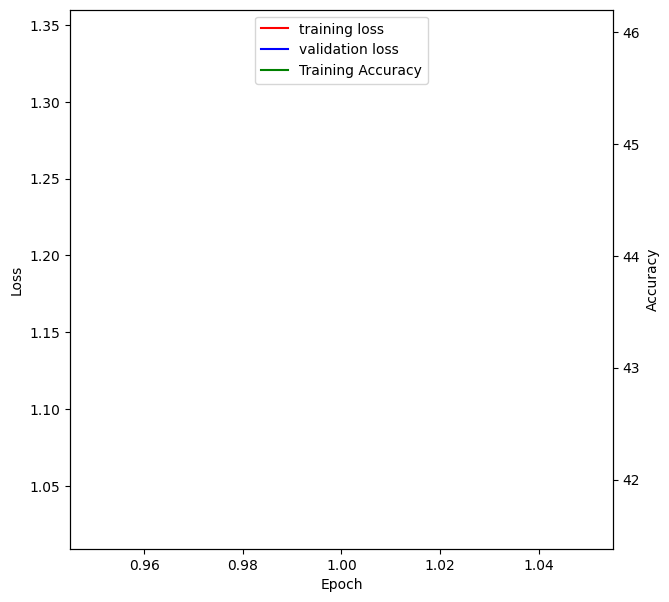

In [32]:
# initiation
model = cnn_model.MyCnnModel()
device = cnn_model.get_default_device()
cnn_model.model_prep_and_summary(model, device)
criterion = cnn_model.default_loss()
optimizer = cnn_model.default_optimizer(model = model)
num_epochs = 1

# get training results
trained_model, train_result_dict = cnn_model.train_model(model, device, train_loader, val_loader, criterion, optimizer, num_epochs)
cnn_model.visualize_training(train_result_dict)

In [33]:
train_result_dict

{'epoch': [1],
 'train_loss': [1.344],
 'val_loss': [1.025],
 'accuracy': [43.79],
 'time': [1091.4]}